## 비모수 검정, 윌콕슨 부호 순위 검정

In [16]:
import numpy as np
from scipy.stats import wilcoxon

In [17]:
# 데이터 생성
data1 = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
data2 = [10, 20, 25, 30, 35, 40, 45, 50, 55, 60]

In [18]:
# 윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(data1, data2)

In [19]:
# 결과 출력
print('Wilcoxon Signed Rank Test')
print('Statistic: ', stat)
print('p-value: ', p)

if p > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Wilcoxon Signed Rank Test
Statistic:  0.0
p-value:  0.001953125
Different distribution (reject H0)


## 윌콕슨 부호 순위 검정 02

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

In [21]:
# 치료 전, 후 데이터 생성
pre_treatment = np.random.randint(1, 10, size = 20)
post_treatment = pre_treatment + np.random.randint(-3, 4, size = 20)

In [22]:
# 데이터프레임으로 저장
data = pd.DataFrame({'pre_treatment' : pre_treatment, 'post_treatment' : post_treatment})
data.to_csv('./treatment_data.csv', index = False)

In [23]:
# 데이터 불러오기
data = pd.read_csv('./treatment_data.csv')

In [24]:
# 윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

In [25]:
# 결과 출력
print('Statistic: ', stat)
print('p-value: ', p)
if p > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistic:  84.0
p-value:  0.4523754119873047
Same distribution (fail to reject H0)


In [26]:
import matplotlib.pyplot as plt

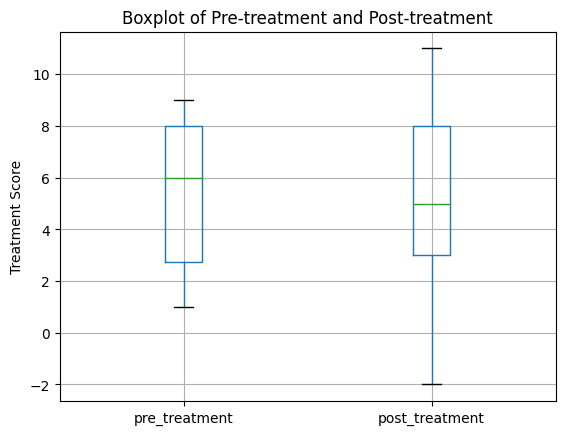

In [31]:
# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

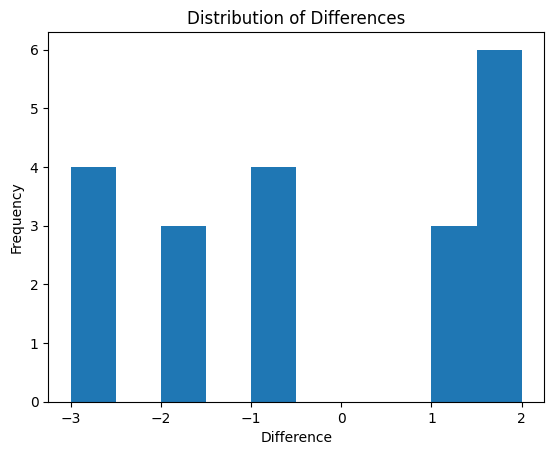

In [32]:
# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()

## 정규분포를 따르지 않는 경우의 윌콕슨 부호 순위 검정

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
np.random.seed(123)

In [40]:
# 정규분포를 따르지 않는 데이터 생성
pre_treatment = np.random.rand(20) + 1
post_treatment = np.random.rand(20) + 2

In [41]:
# 데이터프레임으로 변환
data = pd.DataFrame({'pre_treatment': pre_treatment, 'post_treatment': post_treatment})
print(data)

    pre_treatment  post_treatment
0        1.696469        2.634401
1        1.286139        2.849432
2        1.226851        2.724455
3        1.551315        2.611024
4        1.719469        2.722443
5        1.423106        2.322959
6        1.980764        2.361789
7        1.684830        2.228263
8        1.480932        2.293714
9        1.392118        2.630976
10       1.343178        2.092105
11       1.729050        2.433701
12       1.438572        2.430863
13       1.059678        2.493685
14       1.398044        2.425830
15       1.737995        2.312261
16       1.182492        2.426351
17       1.175452        2.893389
18       1.531551        2.944160
19       1.531828        2.501837


In [42]:
# csv 파일로 저장
data.to_csv('./non_normal_data.csv', index = False)

In [43]:
from scipy.stats import wilcoxon

In [44]:
# 데이터 불러오기
data = pd.read_csv('./non_normal_data.csv')

In [45]:
# 윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

In [46]:
# 결과 출력
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistic: 0.0
p-value: 1.9073486328125e-06
Different distribution (reject H0)


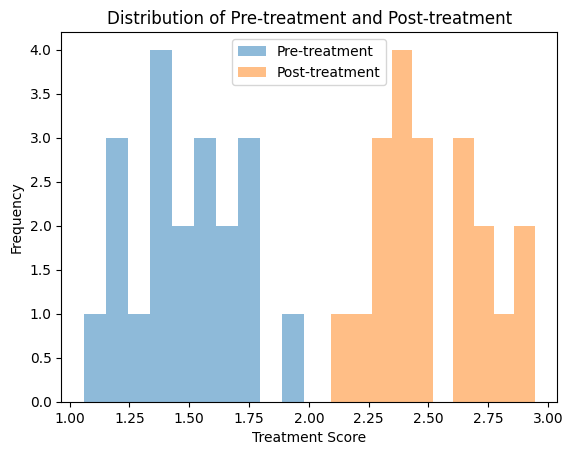

In [47]:
# 분포 시각화
fig, ax = plt.subplots()
ax.hist(data['pre_treatment'], bins=10, alpha=0.5, label='Pre-treatment')
ax.hist(data['post_treatment'], bins=10, alpha=0.5, label='Post-treatment')
ax.set_title('Distribution of Pre-treatment and Post-treatment')
ax.set_xlabel('Treatment Score')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

## 윌콕슨 부호 순위 검정의 다중 검정

In [48]:
import pandas as pd
from scipy.stats import wilcoxon

In [49]:
# 데이터 불러오기
data = pd.read_csv('./treatment_data.csv')

In [52]:
# 여러 개의 가설 검정 수행
for i in range(10):
    # 랜덤으로 데이터를 선택해서 윌콕슨 부호 순위 검정 수행
    sample = data.sample(frac=0.5)
    stat, p = wilcoxon(sample['pre_treatment'], sample['post_treatment'])
    print('Sample', i+1, ':')
    print('Statistic: ', stat)
    print('p-value: ', p)
    if p > 0.05:
        print('Same distribution (fail to reject H0)\n')
    else:
        print('Different distribution (reject H0)\n')

Sample 1 :
Statistic:  22.0
p-value:  0.625
Same distribution (fail to reject H0)

Sample 2 :
Statistic:  19.5
p-value:  0.431640625
Same distribution (fail to reject H0)

Sample 3 :
Statistic:  11.0
p-value:  0.10546875
Same distribution (fail to reject H0)

Sample 4 :
Statistic:  16.5
p-value:  0.322265625
Same distribution (fail to reject H0)

Sample 5 :
Statistic:  16.5
p-value:  0.322265625
Same distribution (fail to reject H0)

Sample 6 :
Statistic:  26.0
p-value:  0.921875
Same distribution (fail to reject H0)

Sample 7 :
Statistic:  27.0
p-value:  1.0
Same distribution (fail to reject H0)

Sample 8 :
Statistic:  14.0
p-value:  0.193359375
Same distribution (fail to reject H0)

Sample 9 :
Statistic:  18.0
p-value:  0.375
Same distribution (fail to reject H0)

Sample 10 :
Statistic:  26.0
p-value:  0.921875
Same distribution (fail to reject H0)



### Bonferroni 보정

In [56]:
import pandas as pd
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

In [62]:
data = pd.read_csv('./treatment_data.csv')

p_values = []

for i in range(10):
    sample = data.sample(frac=0.5)
    st, p = wilcoxon(sample['pre_treatment'], sample['post_treatment'])
    print("sample", i+1, ':')
    print('statistic : ', st)
    print('p-value', p)
    p_values.append(p)
    if p > 0.05:
        print("fail to reject HO")
    else:
        print("reject HO")
        
alpha = 0.05
rejects_bonf, corrected_p_bonf, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')
print("Bonferroni")
for i in range(len(rejects_bonf)):
    if rejects_bonf[i]:
        print(f"sample : {i+1} : reject HO" )
    else:
        print(f"sample : {i+1} : fail to reject HO")

sample 1 :
statistic :  26.0
p-value 0.921875
fail to reject HO
sample 2 :
statistic :  11.0
p-value 0.10546875
fail to reject HO
sample 3 :
statistic :  23.0
p-value 0.6953125
fail to reject HO
sample 4 :
statistic :  18.0
p-value 0.375
fail to reject HO
sample 5 :
statistic :  14.5
p-value 0.232421875
fail to reject HO
sample 6 :
statistic :  24.0
p-value 0.76953125
fail to reject HO
sample 7 :
statistic :  18.5
p-value 0.431640625
fail to reject HO
sample 8 :
statistic :  22.0
p-value 0.625
fail to reject HO
sample 9 :
statistic :  14.5
p-value 0.232421875
fail to reject HO
sample 10 :
statistic :  13.5
p-value 0.193359375
fail to reject HO
Bonferroni
sample : 1 : fail to reject HO
sample : 2 : fail to reject HO
sample : 3 : fail to reject HO
sample : 4 : fail to reject HO
sample : 5 : fail to reject HO
sample : 6 : fail to reject HO
sample : 7 : fail to reject HO
sample : 8 : fail to reject HO
sample : 9 : fail to reject HO
sample : 10 : fail to reject HO


### Benjamini-Hochberg(BH) 보정

In [63]:
rejects_bh, corrected_p_bh, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')
print('Benjamini-Hochberg correction:')
for i in range(len(rejects_bh)):
    if rejects_bh[i]:
        print(f'Sample {i+1}: Different distribution (reject H0)')
    else:
        print(f'Sample {i+1}: Same distribution (fail to reject H0)')

Benjamini-Hochberg correction:
Sample 1: Same distribution (fail to reject H0)
Sample 2: Same distribution (fail to reject H0)
Sample 3: Same distribution (fail to reject H0)
Sample 4: Same distribution (fail to reject H0)
Sample 5: Same distribution (fail to reject H0)
Sample 6: Same distribution (fail to reject H0)
Sample 7: Same distribution (fail to reject H0)
Sample 8: Same distribution (fail to reject H0)
Sample 9: Same distribution (fail to reject H0)
Sample 10: Same distribution (fail to reject H0)
